<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/SVM_salary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC

In [2]:
salary_test = pd.read_csv('/content/SalaryData_Test(1).csv')
salary_train = pd.read_csv('/content/SalaryData_Train(1).csv')

In [3]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
string_columns = [	'workclass',	'education','maritalstatus',	'occupation',	'relationship',	'race',	'sex'	,'native']

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_enc = LabelEncoder()

In [7]:
for i in string_columns:
   salary_train[i] = label_enc.fit_transform(salary_train[i])
   salary_test[i] = label_enc.fit_transform(salary_test[i])
   


In [8]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [9]:
x_train = salary_train.iloc[0:1000,0:13]
y_train = salary_train.iloc[0:1000,[13]].values
x_test = salary_test.iloc[0:300,0:13]
y_test = salary_test.iloc[0:300,[13]].values

In [10]:
model1 = SVC(kernel='linear',probability=True)

In [11]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', probability=True)

In [15]:
y_pred1 = model1.predict(x_test)

In [16]:
y_pred1

array([' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', '

In [17]:
accu1 = np.mean(y_pred1==y_test)*100

In [18]:
model2 = SVC(kernel='poly',probability=True)
model2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly', probability=True)

In [19]:
y_pred2 = model2.predict(x_test)

In [20]:
accu2=np.mean(y_pred2==y_test)

In [21]:
accu2

0.7322666666666666

In [22]:
model3 = SVC(kernel='rbf',probability=True)
model3.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [23]:
y_pred3 = model3.predict(x_test)

In [24]:
accu3 = np.mean(y_pred3==y_test)

In [25]:
accu3

0.7322666666666666

In [26]:
model4 = SVC(kernel='sigmoid',probability=True)
model4.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid', probability=True)

In [27]:
y_pred4=model4.predict(x_test)

In [28]:
accu4 = np.mean(y_pred4==y_test)

In [29]:
accu4

0.7218666666666667

In [30]:
accu_df = {'Kernel':['linear','poly','rbf','sigmoid'],'Accuracy':[accu1,accu2,accu3,accu4]}
accu_df = pd.DataFrame(accu_df)

In [31]:
accu_df

,Kernel,Accuracy
0,linear,68.200000
1,poly,0.732267
2,rbf,0.732267
3,sigmoid,0.721867


In [32]:
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve

In [33]:
y_pred1

array([' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', '

In [34]:
y_pred_bin = pd.Series(y_pred1)

In [35]:
y_pred_bin

0       <=50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
295      >50K
296     <=50K
297     <=50K
298     <=50K
299     <=50K
Length: 300, dtype: object

In [36]:
pdf1 = pd.DataFrame(y_pred_bin,columns=['Pred1'])

In [37]:
pdf1

,Pred1
0,<=50K
1,<=50K
2,<=50K
3,>50K
4,<=50K
...,...
295,>50K
296,<=50K
297,<=50K
298,<=50K


In [38]:
label_enc = LabelEncoder()

In [39]:
en1 = label_enc.fit_transform(pdf1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
en1

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [41]:
en2 = label_enc.fit_transform(y_pred2)

In [42]:
en2

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
y_test_enc = label_enc.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
y_test_enc

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [45]:
p1 = model1.predict_proba(x_test)[:,1]
p2 = model2.predict_proba(x_test)[:,1]
p3 = model3.predict_proba(x_test)[:,1]
p4 = model4.predict_proba(x_test)[:,1]

In [46]:
fpr,tpr,thresholds = roc_curve(y_test_enc, model1.predict_proba(x_test)[:,1])
fpr1,tpr1,thresholds1 = roc_curve(y_test_enc, model2.predict_proba(x_test)[:,1])
fpr2,tpr2,thresholds2 = roc_curve(y_test_enc, model3.predict_proba(x_test)[:,1])
fpr3,tpr3,thresholds3 = roc_curve(y_test_enc, model4.predict_proba(x_test)[:,1])

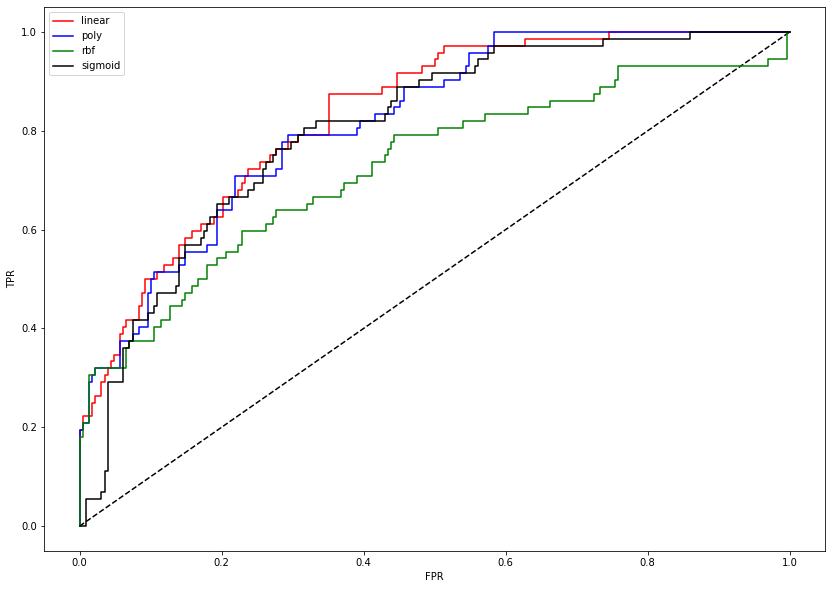

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,color='red',label='linear')
plt.legend(loc='best')
plt.plot(fpr1,tpr1,color='blue',label='poly')
plt.legend(loc='best')
plt.plot(fpr2,tpr2,color='green',label='rbf')
plt.legend(loc='best')
plt.plot(fpr3,tpr3,color='black',label='sigmoid')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [48]:
auc1 = roc_auc_score(y_test, model1.predict_proba(x_test)[:,1])
auc1

0.8312621832358674

In [49]:
auc2 = roc_auc_score(y_test, model2.predict_proba(x_test)[:,1])
auc3 = roc_auc_score(y_test, model3.predict_proba(x_test)[:,1])
auc4= roc_auc_score(y_test, model4.predict_proba(x_test)[:,1])

In [50]:
auc2

0.8177997076023391

In [51]:
auc3

0.725328947368421

In [52]:
auc4

0.8039108187134503